In [1]:
import os
log_dir = "results"
log_name = "train-e5000-b6-lr0001-2023-11-13-09-32-22.log"
with open(os.path.join(log_dir, log_name), 'r') as f:
    log = f.readlines()

In [2]:
logs = []
for line in log:
    line = line.strip()
    line = line.split(', ')
    if len(line) == 1:
        continue
    line = tuple([float(x.split(': ')[1]) for x in line])
    logs.append(line)
print(logs)

[(0.0, 2.3919), (1.0, 0.6644), (2.0, 0.6568), (3.0, 0.6796), (4.0, 0.6905), (5.0, 0.6707), (6.0, 0.6131), (7.0, 0.6264), (8.0, 0.639), (9.0, 0.6392), (10.0, 0.5484), (11.0, 0.624), (12.0, 0.6097), (13.0, 0.5933), (14.0, 0.65), (15.0, 0.6467), (16.0, 0.5879), (17.0, 0.6636), (18.0, 0.6433), (19.0, 0.5825), (20.0, 0.5974), (21.0, 0.5552), (22.0, 0.5452), (23.0, 0.61), (24.0, 0.612), (25.0, 0.6444), (26.0, 0.6668), (27.0, 0.5938), (28.0, 0.6023), (29.0, 0.6102), (30.0, 0.5759), (31.0, 0.5747), (32.0, 0.6347), (33.0, 0.6126), (34.0, 0.5941), (35.0, 0.618), (36.0, 0.6246), (37.0, 0.559), (38.0, 0.6133), (39.0, 0.638), (40.0, 0.5989), (41.0, 0.5806), (42.0, 0.5872), (43.0, 0.5985), (44.0, 0.546), (45.0, 0.59), (46.0, 0.5748), (47.0, 0.5964), (48.0, 0.586), (49.0, 0.5628), (50.0, 0.589), (51.0, 0.5787), (52.0, 0.5926), (53.0, 0.6047), (54.0, 0.5504), (55.0, 0.6103), (56.0, 0.605), (57.0, 0.6007), (58.0, 0.6082), (59.0, 0.5436), (60.0, 0.6151), (61.0, 0.5879), (62.0, 0.5635), (63.0, 0.6307), (

In [3]:
import wandb
wandb.init(
    # set the wandb project where this run will be logged
    project="fea-diffusion",
)
wandb.define_metric("step")
wandb.define_metric("train_loss", step_metric="step")

for step, loss in logs:
    wandb.log({"step": step, "train_loss": loss})

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: namanxkumar (fea-diffusion). Use `wandb login --relogin` to force relogin


In [17]:
logs = logs[1001:]

logs

[(1500.0, 0.5649),
 (1501.0, 0.551),
 (1502.0, 0.5473),
 (1503.0, 0.5884),
 (1504.0, 0.6298),
 (1505.0, 0.5846),
 (1506.0, 0.5716),
 (1507.0, 0.5132),
 (1508.0, 0.6006),
 (1509.0, 0.5538),
 (1510.0, 0.5985),
 (1511.0, 0.5875),
 (1512.0, 0.5898),
 (1513.0, 0.5986),
 (1514.0, 0.6142),
 (1515.0, 0.5788),
 (1516.0, 0.5804),
 (1517.0, 0.5941),
 (1518.0, 0.5778),
 (1519.0, 0.6233),
 (1520.0, 0.575),
 (1521.0, 0.5973),
 (1522.0, 0.6135),
 (1523.0, 0.587),
 (1524.0, 0.5953),
 (1525.0, 0.6103),
 (1526.0, 0.5164),
 (1527.0, 0.64),
 (1528.0, 0.5516),
 (1529.0, 0.5785),
 (1530.0, 0.613),
 (1531.0, 0.5594),
 (1532.0, 0.6202),
 (1533.0, 0.5881),
 (1534.0, 0.5831),
 (1535.0, 0.5571),
 (1536.0, 0.6165),
 (1537.0, 0.5198),
 (1538.0, 0.5715),
 (1539.0, 0.594),
 (1540.0, 0.6065),
 (1541.0, 0.5793),
 (1542.0, 0.5781),
 (1543.0, 0.611),
 (1544.0, 0.6266),
 (1545.0, 0.5436),
 (1546.0, 0.553),
 (1547.0, 0.5463),
 (1548.0, 0.5945),
 (1549.0, 0.5653),
 (1550.0, 0.6233),
 (1551.0, 0.6398),
 (1552.0, 0.5379),
 (

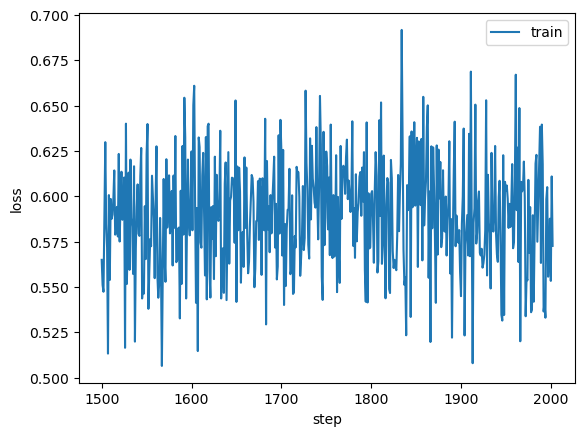

In [18]:
import matplotlib.pyplot as plt

plt.plot([x[0] for x in logs], [x[1] for x in logs], label='train')
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()
plt.show()

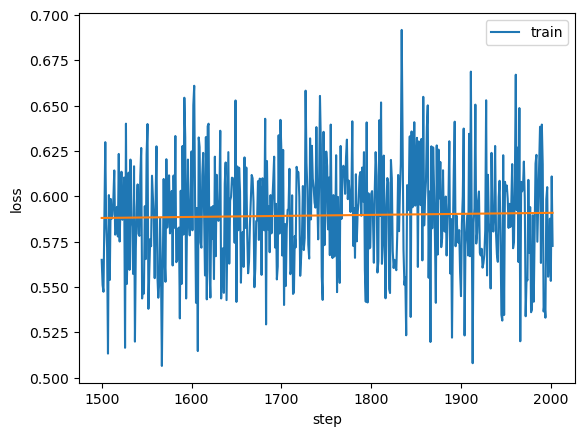

In [19]:
import numpy as np 
m, b = np.polyfit([x[0] for x in logs], [x[1] for x in logs], 1)
plt.plot([x[0] for x in logs], [x[1] for x in logs], label='train')
plt.plot([x[0] for x in logs], m*np.array([x[0] for x in logs])+b)
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()
plt.show()

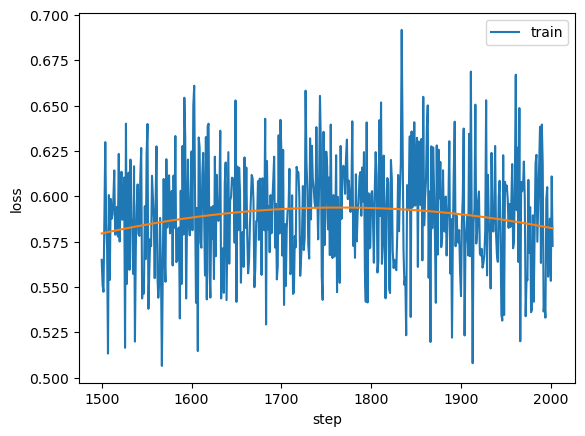

In [20]:
import numpy as np 
a, b, c = np.polyfit([x[0] for x in logs], [x[1] for x in logs], 2)
xax = np.array([x[0] for x in logs])
plt.plot([x[0] for x in logs], [x[1] for x in logs], label='train')
plt.plot([x[0] for x in logs], a*(xax**2) + b*xax + c)
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()
plt.show()

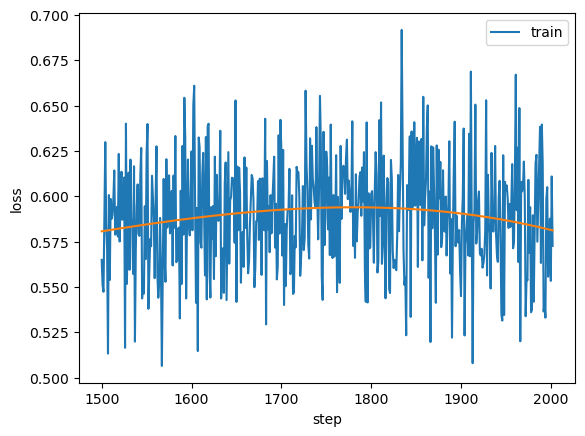

In [21]:
import numpy as np 
a, b, c, d = np.polyfit([x[0] for x in logs], [x[1] for x in logs], 3)
xax = np.array([x[0] for x in logs])
plt.plot([x[0] for x in logs], [x[1] for x in logs], label='train')
plt.plot([x[0] for x in logs], a*(xax**3) + b*(xax**2) + c*xax + d)
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()
plt.show()